In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


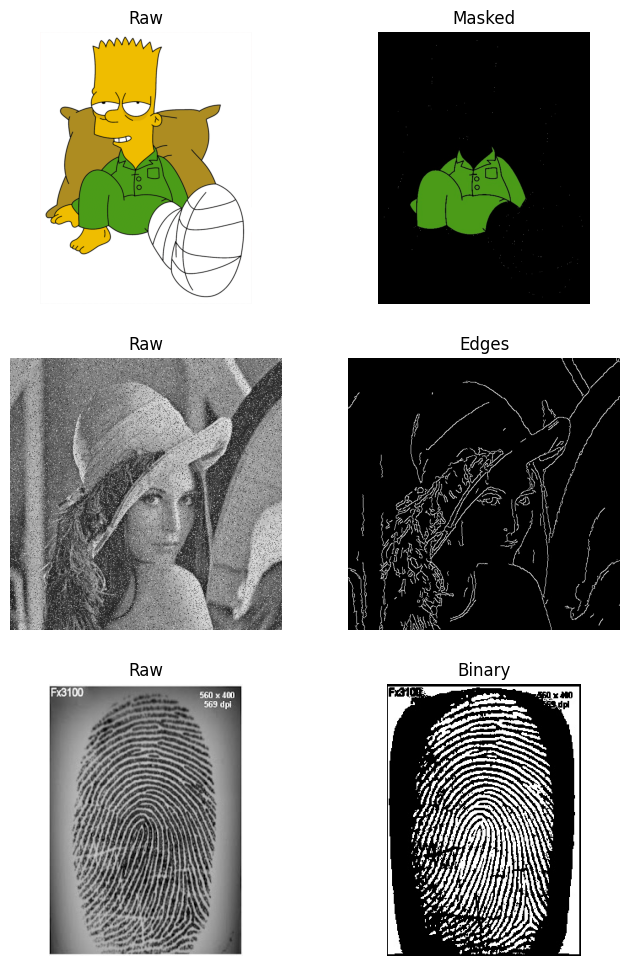

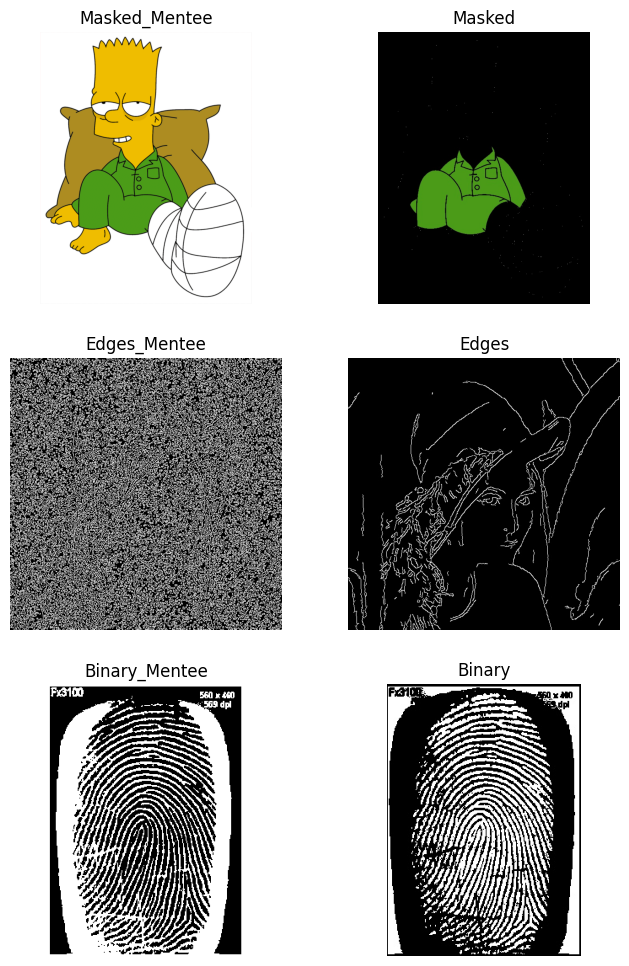

In [2]:
import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
zip_file_path = '/content/images.zip'
extraction_dir = '/content/'


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)
cartoon_path = os.path.join(extraction_dir, 'cartoon.bmp')
cartoon_y_path = os.path.join(extraction_dir, 'cartoon_y.jpg')
girl_path = os.path.join(extraction_dir, 'girl.png')  # Grayscale image
girl_y_path = os.path.join(extraction_dir, 'girl_y.jpg')
fingerprint_path = os.path.join(extraction_dir, 'fingerprint.jpg')
fingerprint_y_path = os.path.join(extraction_dir, 'fingerprint_y.jpg')


cartoon = cv2.imread(cartoon_path)#function returns 3d array greyscael+color
cartoon_y = cv2.imread(cartoon_y_path)
girl = cv2.imread(girl_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
girl_y = cv2.imread(girl_y_path)
fingerprint = cv2.imread(fingerprint_path)
fingerprint_y = cv2.imread(fingerprint_y_path)


fig, axs = plt.subplots(3, 2, figsize=(8, 12))# 3 row 2 column
axs[0, 0].imshow(cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB))#imshow - show the image and convert  bgr to rgb format
axs[0, 1].imshow(cartoon_y)
axs[0, 0].axis("off")
axs[0, 1].axis("off")
axs[0, 0].set_title("Raw")
axs[0, 1].set_title("Masked")
axs[1, 0].imshow(girl, cmap='gray')
axs[1, 1].imshow(girl_y)
axs[1, 0].axis("off")
axs[1, 1].axis("off")
axs[1, 0].set_title("Raw")
axs[1, 1].set_title("Edges")
axs[2, 0].imshow(cv2.cvtColor(fingerprint, cv2.COLOR_BGR2RGB))
axs[2, 1].imshow(fingerprint_y)
axs[2, 0].axis("off")
axs[2, 1].axis("off")
axs[2, 0].set_title("Raw")
axs[2, 1].set_title("Binary")
plt.show()

# START CODE HERE (Do all your processing here)n
cartoon_y_mentee = cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)  # Just an example of RGB conversion

# Process girl image to detect edges
girl_y_mentee = cv2.Canny(girl, 100, 200)  # Edge detection

# Process fingerprint image to create a binary version
gray_fingerprint = cv2.cvtColor(fingerprint, cv2.COLOR_BGR2GRAY)# first cinvert imge to greyscale
_, fingerprint_y_mentee = cv2.threshold(gray_fingerprint, 127, 255, cv2.THRESH_BINARY)#127n is threshold retunr 0 / 1 on basis of threshhold

# END CODE HERE (the final processed image should be cartoon_y_mentee)

# Display processed images
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()

Found 1658 files belonging to 6 classes.


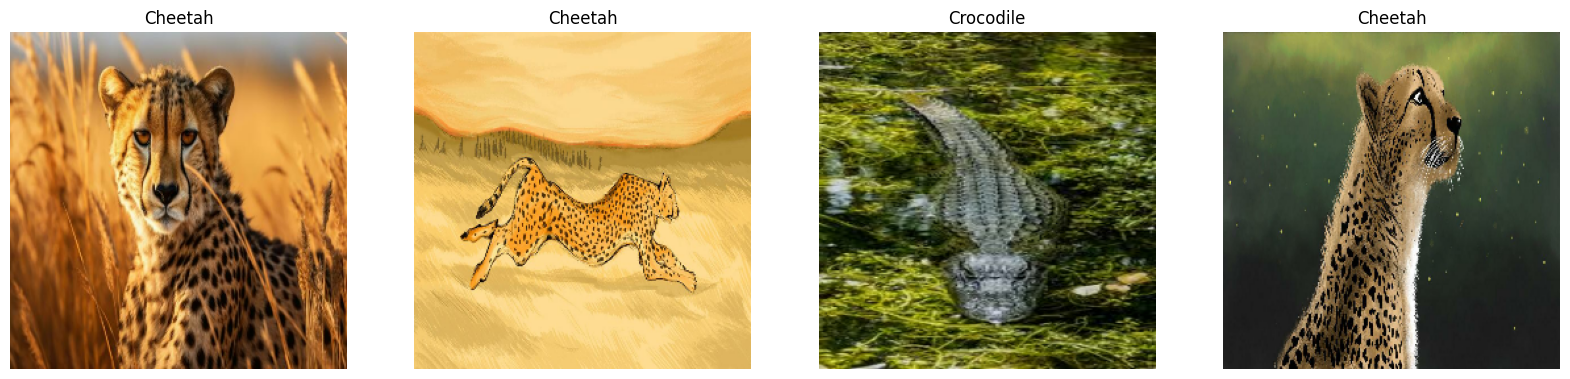

Epoch 1/7
37/37 [==============================] - 224s 6s/step - loss: 1.5545 - accuracy: 0.3328 - val_loss: 1.2133 - val_accuracy: 0.4406
Epoch 2/7
37/37 [==============================] - 208s 6s/step - loss: 1.0747 - accuracy: 0.5236 - val_loss: 1.0548 - val_accuracy: 0.5406
Epoch 3/7
37/37 [==============================] - 207s 6s/step - loss: 0.8503 - accuracy: 0.6706 - val_loss: 0.9683 - val_accuracy: 0.6344
Epoch 4/7
37/37 [==============================] - 205s 6s/step - loss: 0.7028 - accuracy: 0.7441 - val_loss: 0.7683 - val_accuracy: 0.7250
Epoch 5/7
37/37 [==============================] - 212s 6s/step - loss: 0.4045 - accuracy: 0.8530 - val_loss: 0.6564 - val_accuracy: 0.7688
Epoch 6/7
37/37 [==============================] - 209s 6s/step - loss: 0.2897 - accuracy: 0.9012 - val_loss: 0.7825 - val_accuracy: 0.7437
Epoch 7/7
37/37 [==============================] - 208s 6s/step - loss: 0.1648 - accuracy: 0.9485 - val_loss: 0.6543 - val_accuracy: 0.8188


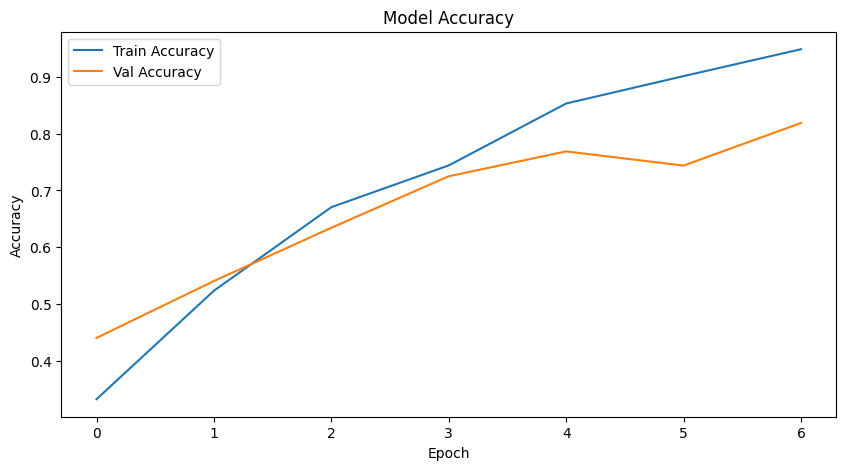

5/5 [==============================] - 17s 1s/step - loss: 0.6174 - accuracy: 0.7987
Try again, not enough accuracy! Your accuracy is 0.798701286315918


In [4]:
#cnn model
import zipfile
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Unzipping the dataset
zip_file_path = '/content/drive/MyDrive/animals.zip'
extraction_dir = '/content/'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# Load the data
def load_data(directory, image_size=(256, 256), batch_size=32):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(directory,image_size=image_size,batch_size=batch_size)
    return dataset

# Load the dataset
data = load_data(extraction_dir)
class_names = data.class_names

data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(class_names[batch[1][idx]])  # Use class names for titles
    ax[idx].axis('off')  # Hide axes

plt.show()
def process_images(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1]
    label = tf.one_hot(label, depth=len(class_names))  # One-hot encode labels
    return image, label

data = data.map(process_images)
def split_data(dataset, val_size=0.2, test_size=0.1):
    dataset_size = len(dataset)
    test_size = int(dataset_size * test_size)
    val_size = int(dataset_size * val_size)
    train_size = dataset_size - val_size - test_size

    train_dataset = dataset.take(train_size)
    val_test_dataset = dataset.skip(train_size)

    val_dataset = val_test_dataset.take(val_size)
    test_dataset = val_test_dataset.skip(val_size)

    return train_dataset, val_dataset, test_dataset

train_data, val_data, test_data = split_data(data)


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Output layer for classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_data, validation_data=val_data, epochs=7)


plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


loss, accuracy = model.evaluate(test_data)
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )
